# Survey Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from sklearn.metrics import accuracy_score
# plt.style.use('ggplot') 
import seaborn as sns
import scipy.stats as stats
import researchpy as rp
import scikit_posthocs as sp

In [2]:
survey_data = pd.read_csv("cooking_survey_data.csv")

In [80]:
survey_data.loc[1]

_id                                       632b10ccc6d26a8f9cb0e859
age                                                             65
confidence_new_foods                                             2
confidence_raw_ingredients                                       1
confidence_recipe                                                1
cooking_enjoyment                                                7
cooking_frequency                                            daily
cooking_technique                                                5
crowdsourcer_id                           5ea040075511b505cf6ec1eb
dietary_needs                                                    7
education                                              high_school
employment_status                                          Retires
equipment                                                        4
gender                                                      female
ingredients_quantity                                          

ERROR! Session/line number was not unique in database. History logging moved to new session 335


In [89]:
pd.options.display.max_rows = 75

In [90]:
print(survey_data['employment_status'].value_counts())

Employed                                                                                               18
Full time                                                                                              16
Unemployed                                                                                             13
full time                                                                                              12
employed                                                                                               12
Employed full time                                                                                      9
Full Time                                                                                               8
Full time employed                                                                                      8
retired                                                                                                 6
Student                                       

In [87]:
print(survey_data['cooking_frequency'].value_counts())
print(survey_data['cooking_frequency'].value_counts(normalize=True)*100)

2 to 3 times a week      61
4 to 6 times a week      52
daily                    36
once a week              25
less than once a week    23
never                     3
Name: cooking_frequency, dtype: int64
2 to 3 times a week      30.5
4 to 6 times a week      26.0
daily                    18.0
once a week              12.5
less than once a week    11.5
never                     1.5
Name: cooking_frequency, dtype: float64


In [88]:
survey_data['cooking_enjoyment'].describe()

count    200.000000
mean       5.130000
std        1.595565
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: cooking_enjoyment, dtype: float64

In [46]:
print(survey_data['gender'].value_counts())
print(survey_data['gender'].value_counts(normalize=True)*100)

female    123
male       75
other       2
Name: gender, dtype: int64
female    61.5
male      37.5
other      1.0
Name: gender, dtype: float64


In [47]:
print(survey_data['age'].value_counts())
print(survey_data['age'].value_counts(normalize=True)*100)

25_34    60
35_44    52
45_54    29
18_24    28
55_64    22
65        9
Name: age, dtype: int64
25_34    30.0
35_44    26.0
45_54    14.5
18_24    14.0
55_64    11.0
65        4.5
Name: age, dtype: float64


In [52]:
survey_data['recipe_history'].describe()

count    200.000000
mean       3.940000
std        1.822914
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: recipe_history, dtype: float64

In [56]:
survey_data[survey_data['age_group']=='younger than 45']['recipe_history'].describe()

count    140.000000
mean       4.278571
std        1.799552
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        7.000000
Name: recipe_history, dtype: float64

In [57]:
survey_data[survey_data['age_group']=='45 or older']['recipe_history'].describe()

count    60.000000
mean      3.150000
std       1.634636
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: recipe_history, dtype: float64

In [66]:
survey_data[survey_data['age_group']=='younger than 45']['cooking_enjoyment'].describe()

count    140.000000
mean       5.057143
std        1.603824
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: cooking_enjoyment, dtype: float64

In [67]:
survey_data[survey_data['age_group']=='45 or older']['cooking_enjoyment'].describe()

count    60.000000
mean      5.300000
std       1.576308
min       1.000000
25%       4.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: cooking_enjoyment, dtype: float64

In [ ]:
survey_data['employment']

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Applications/anaconda3/envs/nlp_env/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'employment'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Applications/anaconda3/envs/nlp_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/s5/bzbx55tj3z9_m2zf39_b76_00000gn/T/ipykernel_79865/3829853338.p

In [68]:
stats.mannwhitneyu(survey_data[survey_data['age_group']=='younger than 45']['cooking_enjoyment'],
                survey_data[survey_data['age_group']=='45 or older']['cooking_enjoyment'],
               )

MannwhitneyuResult(statistic=3816.0, pvalue=0.29617415160531)

In [74]:
print(f"Cooking Enjoyment - Recipe History: {stats.pearsonr(survey_data['cooking_enjoyment'], survey_data['recipe_history'])}")
print(f"Cooking Enjoyment - Science: {stats.pearsonr(survey_data['cooking_enjoyment'], survey_data['science_cooking_process'])}")

Cooking Enjoyment - Recipe History: (0.13227204423192992, 0.061888147475898735)
Cooking Enjoyment - Science: (0.1742200036550981, 0.013613697432617769)


In [65]:
stats.mannwhitneyu(survey_data[survey_data['age_group']=='younger than 45']['science_cooking_process'],
                survey_data[survey_data['age_group']=='45 or older']['science_cooking_process']
               )

MannwhitneyuResult(statistic=5061.5, pvalue=0.020024555148331732)

In [63]:
stats.ttest_ind(survey_data[survey_data['age_group']=='younger than 45']['cooking_enjoyment'],
                survey_data[survey_data['age_group']=='45 or older']['cooking_enjoyment']
               )

Ttest_indResult(statistic=-0.9863505986930206, pvalue=0.3251648711123891)

In [16]:
survey_data.corr()

,confidence_new_foods,confidence_raw_ingredients,confidence_recipe,cooking_enjoyment,cooking_technique,dietary_needs,equipment,ingredients_quantity,meal,preparation,recipe_history,recommend_recipe,science_cooking_process,step_importance,temperature,time,knowledge_mean,cooking_confidence
confidence_new_foods,1.000000,7.962972e-01,0.745420,-0.509693,0.126836,-0.058879,0.032576,-0.002797,3.051969e-02,0.065112,0.055369,0.124682,0.016607,0.004532,-0.053925,0.042494,0.032504,0.922844
confidence_raw_ingredients,0.796297,1.000000e+00,0.744503,-0.412369,0.165457,-0.072860,0.058041,0.037769,-6.644721e-17,0.133442,0.049400,0.178668,-0.037781,-0.032165,0.020283,0.049062,-0.007179,0.924160
confidence_recipe,0.745420,7.445026e-01,1.000000,-0.322777,0.052502,-0.082643,-0.082483,-0.094205,3.145298e-02,-0.042716,0.029824,0.095188,-0.085277,-0.092493,-0.087941,-0.058372,-0.058969,0.904794
cooking_enjoyment,-0.509693,-4.123691e-01,-0.322777,1.000000,-0.000669,0.074780,-0.047185,0.022310,1.157034e-01,-0.010372,0.132272,0.058591,0.174220,0.059866,0.001885,-0.117562,0.153289,-0.451992
cooking_technique,0.126836,1.654575e-01,0.052502,-0.000669,1.000000,0.341583,0.469770,0.374612,2.525879e-01,0.404457,0.365908,0.377113,0.382172,0.294569,0.290824,0.290783,0.432092,0.125465
dietary_needs,-0.058879,-7.286032e-02,-0.082643,0.074780,0.341583,1.000000,0.355541,0.447959,3.623876e-01,0.400328,0.186724,0.336636,0.280481,0.188072,0.332215,0.356297,0.271103,-0.077960
equipment,0.032576,5.804086e-02,-0.082483,-0.047185,0.469770,0.355541,1.000000,0.446149,2.602947e-01,0.408020,0.180867,0.357473,0.220396,0.319418,0.376444,0.360094,0.294264,0.003074
ingredients_quantity,-0.002797,3.776935e-02,-0.094205,0.022310,0.374612,0.447959,0.446149,1.000000,2.332975e-01,0.674160,0.054875,0.474696,0.172785,0.225133,0.620264,0.433680,0.183591,-0.021347
meal,0.030520,-6.644721e-17,0.031453,0.115703,0.252588,0.362388,0.260295,0.233297,1.000000e+00,0.228683,0.427737,0.387828,0.365243,0.339126,0.219961,0.244110,0.468784,0.022395
preparation,0.065112,1.334417e-01,-0.042716,-0.010372,0.404457,0.400328,0.408020,0.674160,2.286832e-01,1.000000,0.046541,0.447162,0.092959,0.188728,0.588218,0.459304,0.132303,0.056925


In [29]:
survey_data['age_group'] = np.where((survey_data['age']=='65')|(survey_data['age']=='55_64')|(survey_data['age']=='45_54'), '45 or older','younger than 45') 


In [31]:
survey_data.to_csv('extended_cooking_survey_data.csv', index=False)

In [33]:
survey_data


,_id,age,confidence_new_foods,confidence_raw_ingredients,confidence_recipe,cooking_enjoyment,cooking_frequency,cooking_technique,crowdsourcer_id,dietary_needs,...,recommend_recipe,science_cooking_process,smart_assistants,step_importance,temperature,time,user_id,knowledge_mean,cooking_confidence,age_group
0,632b10c4c6d26a8f9cb0e856,18_24,1,1,1,7,daily,7,5e831250400f0a0289ba4f3a,7,...,7,7,daily,7,7,7,6347c635-55b1-40b9-a974-99565e7b2ac6,7.000000,1.000000,younger than 45
1,632b10ccc6d26a8f9cb0e859,65,2,1,1,7,daily,5,5ea040075511b505cf6ec1eb,7,...,4,6,never,7,7,7,3e7a6c03-553d-4125-bc23-b687e0c868e0,5.666667,1.333333,45 or older
2,632b10ccc6d26a8f9cb0e85b,18_24,4,5,2,3,less than once a week,4,60f9a20850f30c28ac823268,5,...,5,3,less than once a week,5,6,7,14122b6c-40c7-40b2-9574-8fd8bfed42ae,3.333333,3.666667,younger than 45
3,632b10e0c6d26a8f9cb0e85d,35_44,6,5,3,4,once a week,4,613dee63d49b5e8e265b7b3d,4,...,6,5,4 to 6 times a week,5,7,6,0f3e04c6-1195-43f1-b4e1-d821a55b5b21,4.333333,4.666667,younger than 45
4,632b10e7c6d26a8f9cb0e85f,35_44,7,7,7,1,never,7,5f68e069c74f3f0775307fc6,6,...,5,3,daily,5,6,6,9fb52537-ced8-4c1d-a7c1-e8229101648e,3.666667,7.000000,younger than 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,632b56f3d6454f0a0f0d3b41,45_54,2,1,1,4,less than once a week,4,615a0198a1a2d449a781b8a5,7,...,5,4,less than once a week,5,7,7,97827463-c916-4d57-b8a1-d006bd48b087,4.000000,1.333333,45 or older
196,632b571ed6454f0a0f0d3b43,18_24,4,4,2,6,2 to 3 times a week,7,5ed399e001db9531e9476683,7,...,3,7,once a week,3,7,7,7a5b248f-5723-411c-9069-47398c70bd07,4.333333,3.333333,younger than 45
197,632b586fd87e04249cf5823f,65,2,2,2,6,2 to 3 times a week,2,5f8df5c911644418a561b19a,6,...,6,1,once a week,2,7,7,91aa4708-c00d-499d-a723-2d94c619e188,1.333333,2.000000,45 or older
198,632b58f6d87e04249cf58241,25_34,2,2,2,6,daily,4,5ecd5323fb5b270994f96437,3,...,5,2,2 to 3 times a week,3,7,7,dd6ce366-1215-479b-86b2-8fe82426493c,2.666667,2.000000,younger than 45


In [4]:
survey_data['knowledge_mean'] = survey_data.loc[:,['recipe_history','science_cooking_process','step_importance']].apply(np.mean,axis=1)
survey_data['cooking_confidence'] = survey_data.loc[:,['confidence_new_foods','confidence_raw_ingredients','confidence_recipe']].apply(np.mean,axis=1)

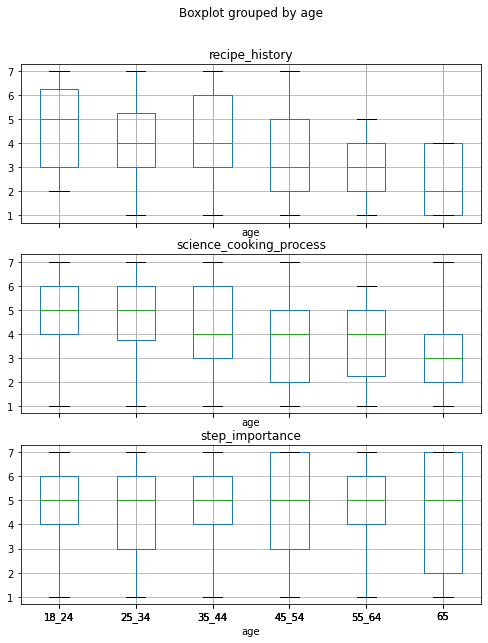

In [38]:
#age_ratings = survey_data.groupby('age')
#age_ratings.boxplot(subplots=False,figsize=(15, 5))
fig, ax = plt.subplots(3, sharex='col', figsize=(8,10))
survey_data.boxplot("recipe_history", by="age", ax=ax[0])
survey_data.boxplot("science_cooking_process", by="age", ax=ax[1])
survey_data.boxplot("step_importance", by="age", ax=ax[2])

#ax[0].boxplot(survey_data['age'], survey_data['recipe_history'])
#ax[1].boxplot(survey_data['age'], survey_data['science_cooking_process'])
#ax[2].boxplot(survey_data['age'], survey_data['step_importance'])
plt.show()

#survey_data.boxplot(["recipe_history",'science_cooking_process','step_importance'], by="age")

<AxesSubplot:title={'center':'knowledge_mean'}, xlabel='gender'>

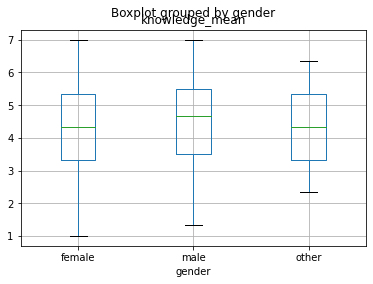

In [10]:
survey_data.boxplot("knowledge_mean", by="gender")

In [25]:
survey_data["education"].value_counts()

bachelor                84
high_school             67
master                  27
vocational_education    14
phd                      5
less_high_school         3
Name: education, dtype: int64

array([[<AxesSubplot:title={'center':'recipe_history'}, xlabel='education'>,
        <AxesSubplot:title={'center':'science_cooking_process'}, xlabel='education'>],
       [<AxesSubplot:title={'center':'step_importance'}, xlabel='education'>,
        <AxesSubplot:>]], dtype=object)

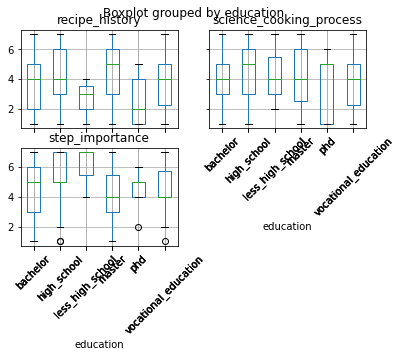

In [22]:
survey_data.boxplot(["recipe_history",'science_cooking_process','step_importance'], by="education", rot=45)

array([[<AxesSubplot:title={'center':'recipe_history'}, xlabel='cooking_enjoyment'>,
        <AxesSubplot:title={'center':'science_cooking_process'}, xlabel='cooking_enjoyment'>],
       [<AxesSubplot:title={'center':'step_importance'}, xlabel='cooking_enjoyment'>,
        <AxesSubplot:>]], dtype=object)

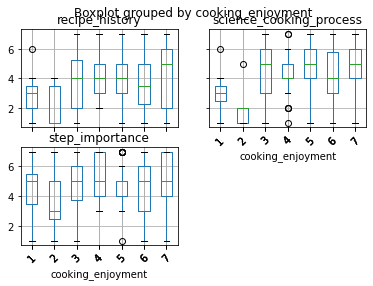

In [34]:
survey_data.boxplot(["recipe_history",'science_cooking_process','step_importance'], by="cooking_enjoyment", rot=45)

<AxesSubplot:title={'center':'knowledge_mean'}, xlabel='smart_assistants'>

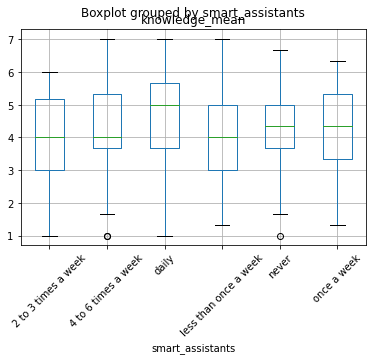

In [7]:
survey_data.boxplot("knowledge_mean", by="smart_assistants", rot=45)

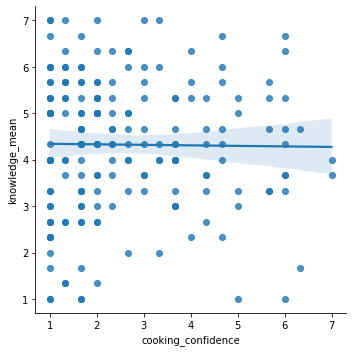

In [15]:
sns.lmplot(x="cooking_confidence", y="recipe_history", data=survey_data, fit_reg=True)

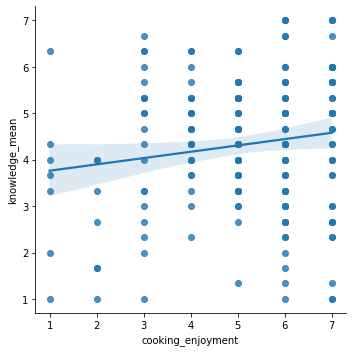

In [9]:
sns.lmplot(x="cooking_enjoyment", y="knowledge_mean", data=survey_data, fit_reg=True)

In [13]:
melted_survey_data = pd.melt(survey_data,
                                    id_vars='_id', 
                                    value_vars=['recipe_history',
                                                'science_cooking_process',
                                                'recommend_recipe',
                                                'step_importance',
                                                'dietary_needs',
                                                'ingredients_quantity',
                                                'equipment',
                                                'temperature',
                                                'time',
                                                'cooking_technique',
                                                'preparation',
                                                'meal'],
                                       var_name='feature',
                                       value_name='rating')

In [14]:
melted_survey_data

,_id,feature,rating
0,632b10c4c6d26a8f9cb0e856,recipe_history,7
1,632b10ccc6d26a8f9cb0e859,recipe_history,4
2,632b10ccc6d26a8f9cb0e85b,recipe_history,2
3,632b10e0c6d26a8f9cb0e85d,recipe_history,3
4,632b10e7c6d26a8f9cb0e85f,recipe_history,3
...,...,...,...
2395,632b56f3d6454f0a0f0d3b41,meal,2
2396,632b571ed6454f0a0f0d3b43,meal,3
2397,632b586fd87e04249cf5823f,meal,6
2398,632b58f6d87e04249cf58241,meal,5


<AxesSubplot:>

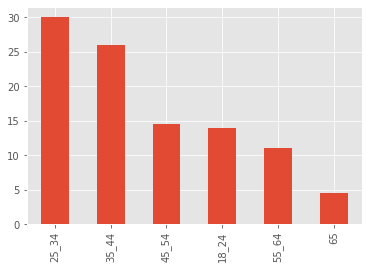

In [100]:
age_dist = survey_data['age'].value_counts(normalize=True)*100
age_dist.plot.bar()

<AxesSubplot:>

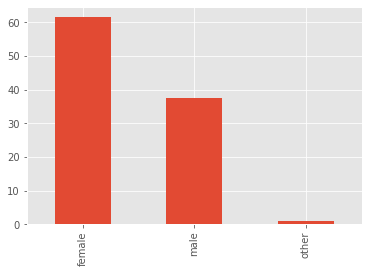

In [6]:
gender_dist = survey_data['gender'].value_counts(normalize=True)*100
gender_dist.plot.bar()

In [20]:
assistant_features = survey_data.loc[:,[
    '_id',
    'recipe_history',
    'science_cooking_process',
    'recommend_recipe',
    'step_importance',
    'dietary_needs',
    'ingredients_quantity',
    'equipment',
    'temperature',
    'time',
    'cooking_technique',
    'preparation',
    'meal']]

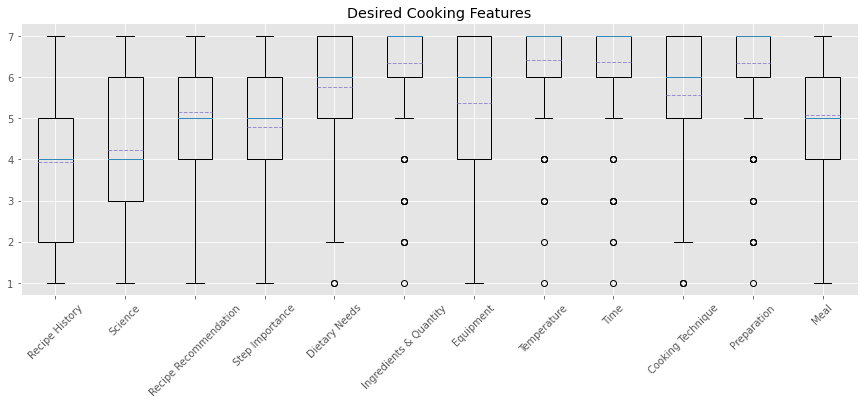

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(assistant_features.iloc[:,1:], showmeans=True, meanline=True,
          labels=('Recipe History','Science', 'Recipe Recommendation', 'Step Importance', 'Dietary Needs',
                  'Ingredients & Quantity', 'Equipment','Temperature', 'Time', 'Cooking Technique', 'Preparation', 'Meal'))
ax.set_title('Desired Cooking Features')
plt.xticks(rotation=45)
plt.show()

In [31]:
melted_assistant_features = pd.melt(assistant_features,
                                    id_vars='_id', 
                                    value_vars=['recipe_history',
                                                'science_cooking_process',
                                                'recommend_recipe',
                                                'step_importance',
                                                'dietary_needs',
                                                'ingredients_quantity',
                                                'equipment',
                                                'temperature',
                                                'time',
                                                'cooking_technique',
                                                'preparation',
                                                'meal'],
                                       var_name='feature',
                                       value_name='rating')

In [87]:
melted_assistant_features['need_type'] = np.where(((melted_assistant_features['feature'] == 'recipe_history')|(melted_assistant_features['feature']=='science_cooking_process')|(melted_assistant_features['feature']=='step_importance')), 'knowledge','process') 
melted_assistant_features

,_id,feature,rating,need_type
0,632b10c4c6d26a8f9cb0e856,recipe_history,7,knowledge
1,632b10ccc6d26a8f9cb0e859,recipe_history,4,knowledge
2,632b10ccc6d26a8f9cb0e85b,recipe_history,2,knowledge
3,632b10e0c6d26a8f9cb0e85d,recipe_history,3,knowledge
4,632b10e7c6d26a8f9cb0e85f,recipe_history,3,knowledge
...,...,...,...,...
2395,632b56f3d6454f0a0f0d3b41,meal,2,process
2396,632b571ed6454f0a0f0d3b43,meal,3,process
2397,632b586fd87e04249cf5823f,meal,6,process
2398,632b58f6d87e04249cf58241,meal,5,process


In [32]:
cooking_desires_comparison = stats.f_oneway(assistant_features['recipe_history'],
                                            assistant_features['science_cooking_process'],
                                            assistant_features['recommend_recipe'],
                                            assistant_features['step_importance'],
                                            assistant_features['dietary_needs'],
                                            assistant_features['ingredients_quantity'],
                                            assistant_features['equipment'],
                                            assistant_features['temperature'],
                                            assistant_features['time'],
                                            assistant_features['cooking_technique'],
                                            assistant_features['preparation'],
                                            assistant_features['meal'])
print(cooking_desires_comparison)
cooking_desires_posthoc = sp.posthoc_ttest(melted_assistant_features, val_col='rating', group_col='feature',
                                           p_adjust='bonferroni')
display(cooking_desires_posthoc)
#display(rp.summary_cont(no_context_results['f1_infoneed'].groupby(no_context_results['model'])))


F_onewayResult(statistic=68.09919906716178, pvalue=7.21098486200556e-133)


,recipe_history,science_cooking_process,recommend_recipe,step_importance,dietary_needs,ingredients_quantity,equipment,temperature,time,cooking_technique,preparation,meal
recipe_history,1.000000e+00,1.000000e+00,1.572191e-09,8.370272e-05,1.309950e-24,8.262546e-43,5.609703e-14,4.159754e-46,5.210388e-44,6.980740e-19,3.340825e-42,1.995092e-09
science_cooking_process,1.000000e+00,1.000000e+00,1.655350e-05,8.067125e-02,2.397110e-18,1.776688e-35,3.814796e-09,1.482223e-38,1.474647e-36,2.922011e-13,6.728326e-35,3.023479e-05
recommend_recipe,1.572191e-09,1.655350e-05,1.000000e+00,1.000000e+00,3.624939e-03,3.514883e-14,1.000000e+00,3.448159e-16,9.114281e-15,6.200575e-01,9.075140e-14,1.000000e+00
step_importance,8.370272e-05,8.067125e-02,1.000000e+00,1.000000e+00,1.889454e-08,4.032697e-23,2.690464e-02,8.219220e-26,5.350394e-24,8.468026e-05,1.342053e-22,1.000000e+00
dietary_needs,1.309950e-24,2.397110e-18,3.624939e-03,1.889454e-08,1.000000e+00,1.241537e-04,4.973061e-01,5.210032e-06,5.766261e-05,1.000000e+00,2.428516e-04,1.293969e-04
ingredients_quantity,8.262546e-43,1.776688e-35,3.514883e-14,4.032697e-23,1.241537e-04,1.000000e+00,2.322632e-10,1.000000e+00,1.000000e+00,5.714210e-08,1.000000e+00,4.748966e-18
equipment,5.609703e-14,3.814796e-09,1.000000e+00,2.690464e-02,4.973061e-01,2.322632e-10,1.000000e+00,3.710769e-12,7.399550e-11,1.000000e+00,5.489176e-10,1.000000e+00
temperature,4.159754e-46,1.482223e-38,3.448159e-16,8.219220e-26,5.210032e-06,1.000000e+00,3.710769e-12,1.000000e+00,1.000000e+00,1.073646e-09,1.000000e+00,1.199444e-20
time,5.210388e-44,1.474647e-36,9.114281e-15,5.350394e-24,5.766261e-05,1.000000e+00,7.399550e-11,1.000000e+00,1.000000e+00,1.973419e-08,1.000000e+00,7.193822e-19
cooking_technique,6.980740e-19,2.922011e-13,6.200575e-01,8.468026e-05,1.000000e+00,5.714210e-08,1.000000e+00,1.073646e-09,1.973419e-08,1.000000e+00,1.301558e-07,8.820982e-02


In [98]:
print(f"Levene's Test: {stats.levene(melted_assistant_features[melted_assistant_features['need_type']=='knowledge']['rating'], melted_assistant_features[melted_assistant_features['need_type']=='process']['rating'])}")
print(f"Shapiro Knowledge: {stats.shapiro(melted_assistant_features[melted_assistant_features['need_type']=='knowledge']['rating'])}")
print(f"Shapiro Rating: {stats.shapiro(melted_assistant_features[melted_assistant_features['need_type']=='process']['rating'])}")

Levene's Test: LeveneResult(statistic=95.16534798593462, pvalue=4.480002553179451e-22)
Shapiro Knowledge: ShapiroResult(statistic=0.9366797804832458, pvalue=2.8269883433289884e-15)
Shapiro Rating: ShapiroResult(statistic=0.7949327230453491, pvalue=6.866362475191604e-43)


In [95]:
melted_assistant_features[melted_assistant_features['need_type']=="knowledge"]["rating"]

0      7
1      4
2      2
3      3
4      3
      ..
795    5
796    3
797    2
798    3
799    5
Name: rating, Length: 600, dtype: int64

In [89]:
stats.ttest_ind(melted_assistant_features[melted_assistant_features['feature']=="recipe_history"]["rating"], 
                melted_assistant_features[melted_assistant_features['feature']=="science_cooking_process"]["rating"])


Ttest_indResult(statistic=-20.78631849066513, pvalue=2.25554422424843e-88)

In [99]:
stats.mannwhitneyu(melted_assistant_features[melted_assistant_features['need_type']=="knowledge"]["rating"], 
                melted_assistant_features[melted_assistant_features['need_type']=="process"]["rating"])

MannwhitneyuResult(statistic=276833.5, pvalue=1.9613946855113637e-76)

<AxesSubplot:title={'center':'rating'}, xlabel='need_type'>

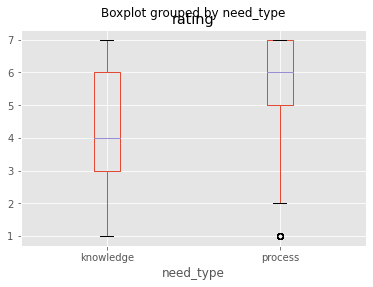

In [90]:
melted_assistant_features.boxplot(column="rating", by="need_type")